<b> Проект: "Исследование мирового рынка игр" </b>
    
<b> Оглавление проекта:</b>

[1. Загрузка и предобработка данных.](#step_1)
    
[2. Исследовательский анализ данных.](#step_2)
    
[3. Составление портрета пользователя каждого региона.](#step_3)
    
[4. Проверка статистических гипотез.](#step_4)

[4.1. Гипотеза №1 : Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.](#step_4.1)

[4.2. Гипотеза №2 : Средние пользовательские рейтинги жанров Action и Sports различаются.](#step_4.2)

[5. Общие выводы и рекомендации.](#step_5)

<a id="step_1"></a> 
## Загрузка и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем названия столбцов к нижнему регистру.

In [4]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выведем строки с пропусками в столбце 'name'.

In [5]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в играх с годом выпуска 1993, в большинстве стобцов данные об этих 
играх отсутствуют, следовательно данные строки неинформативны и их можно удалить.

In [6]:
df = df.dropna(subset=['name'])
df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Обработаем пропуски в столбце rating заменив пропуски на значение "unknow", для возможности оценки влияния рейтинга на продажи

In [7]:
df['rating'] = df['rating'].fillna("unknow")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Проверим сколько игр в каждой категории рейтинга.

In [8]:
df['rating'].value_counts()

unknow    6764
E         3990
T         2961
M         1563
E10+      1420
EC           8
RP           3
K-A          3
AO           1
Name: rating, dtype: int64

Категории рейтинга "EC", "K-A", "RP", "AO" встречаются крайне редко. Заменим данные категории на подходящие по смыслу.

In [9]:
df['rating'] = df['rating'].replace({'EC':'E','RP':'unknow','K-A':'E','AO':'M'})
df['rating'].value_counts()

unknow    6767
E         4001
T         2961
M         1564
E10+      1420
Name: rating, dtype: int64

Изменим тип данных в столбце 'year_of_release'.

In [10]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


Выведем уникальные значения столбца 'user_score'.

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Рассчитаем количество значений "tbd" в столбце 'user_score'.

In [12]:
df.query('user_score == "tbd"')['user_score'].count()

2424

Пропуски в столбцах: `year_of_release`, `critic_score`, `user_score` оставим без изменений т.к. для данных столбцов нет уместного способа заполнения пропусков. 

Столбцы `critic_score`, `user_score` хранят в себе оценки критиков и пользователей в диапазоне от 0 до 100, если заменить пропуски в этих столбцах медианными значениями, сгруппированными по определенным признакам, можно сильно ошибиться и исказить фактические данные. Значение "tbd" это аббревиатура от английского To Be Determined (будет определено) используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Данное значение встречается в столбце `user_score` и будет расцениваться, как пропущенное значение.

Столбец `rating` содержит рейтинг от организации ESRB с указанием определенной возрастной группы, присваиваемой по неким конкретным параметрам, заполнять пропуски случайным распределением неуместно, однако для возможности оценить влияние рейтинга на продажи, мы обработали пропуски в столбце rating заменив пропуски на значение "unknow".

Рассчитаем суммарные продажи игры во всех регионгах и запишем в отдельный столбец.

In [13]:
df['all_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow,31.38


<a id="step_2"></a> 
## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы и определим актуальный период для исследования.

In [14]:
games_by_year = df.groupby('year_of_release').agg({'name':'count'}).reset_index().rename(columns={'name':'games_count'})
games_by_year.head()

,year_of_release,games_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


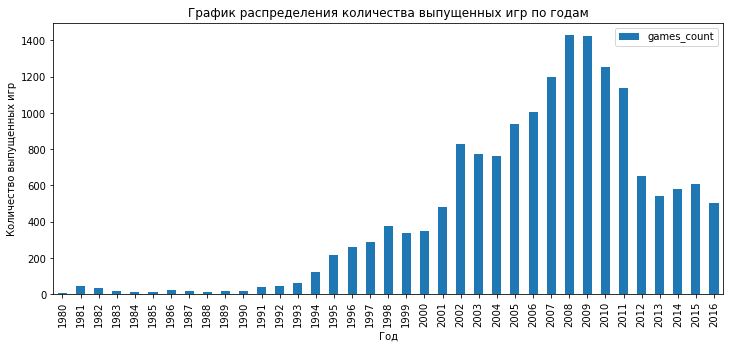

In [15]:
ax = games_by_year.plot.bar(x='year_of_release',y='games_count',figsize=(12,5))
plt.title('График распределения количества выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.show()

Параллельно с развитием технологий развивались и компьютерные игры, игры выпущенные в 1980 году невозможно сравнивать по характеристикам, массовости с играми выпущенными в 2016.

Чем быстрее развиваются технологии, тем существеннее отличия в играх разных годов и тем сложнее их сравнивать. К тому же изменяются предпочтения потребителей и маркетинговые стратегии продвижения продукта. В связи с вышеперечисленными факторами, для анализа важна выборка только за последние несколько лет, установим актуальный период между 2010 и 2016 годами.


Проанализируем, как менялись продажи по платформам. Выберем платформы с
наибольшими суммарными продажами и построим распределение по годам.

In [16]:
print('Kоличество платформ в выборке :',df['platform'].nunique())

Kоличество платформ в выборке : 31


Найдем топ платформы с наибольшими суммарными продажами.

In [17]:
top_platform = df.groupby('platform').agg({'all_sales':'sum'}).sort_values(by='all_sales',ascending=False).head()
top_platform

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [18]:
# создадим таблицу с данными только по топ платформам
df_top_platform = df.query('platform in @top_platform.index')
df_top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,unknow,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unknow,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknow,0.01


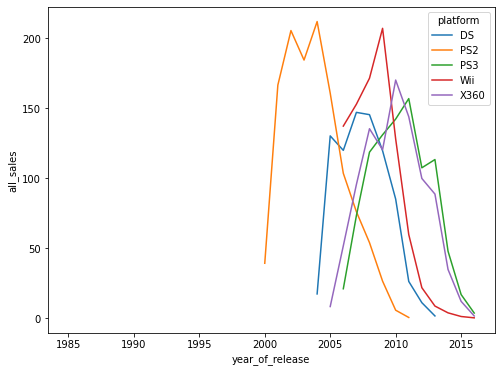

In [19]:
# построим график распределения суммарных продаж по годам
df_top_platform.pivot_table(index='year_of_release',columns='platform',values='all_sales',aggfunc='sum').plot(figsize=(8,6))
plt.ylabel('all_sales')
plt.show()

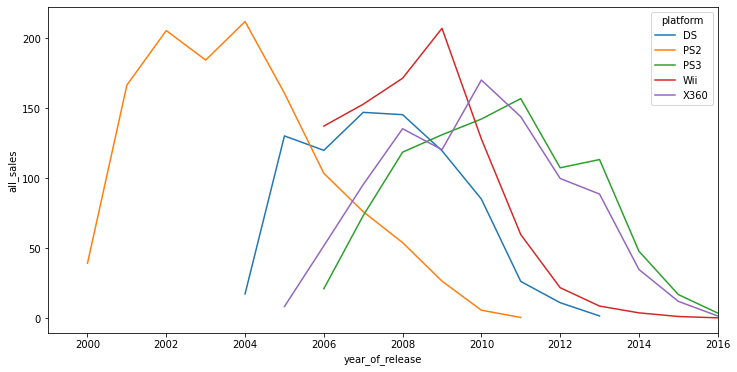

In [20]:
# построим график распределения суммарных продаж по годам
df_top_platform.pivot_table(index='year_of_release',columns='platform',values='all_sales',aggfunc='sum').plot(figsize=(12,6))
plt.ylabel('all_sales')
plt.xlim(1999,2016)
plt.show()

In [21]:
# создадим таблицу с минимальным и максимальным годом упоминания платформы
df_years = df[['platform','year_of_release']]
df_years = df_years.pivot_table(index='platform', values='year_of_release',aggfunc=['min','max'])
df_years.columns = ['min_year','max_year']
df_years.head()

,min_year,max_year
platform,,
2600,1980,1989
3DO,1994,1995
3DS,2011,2016
DC,1998,2008
DS,1985,2013


In [22]:
# рассчитаем и добавим в таблицу значение продолжительности лет работы платформы
df_years['duration'] = df_years['max_year'] - df_years['min_year']
df_years.reset_index(inplace=True)
df_years.head()

,platform,min_year,max_year,duration
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,1985,2013,28


In [23]:
# найдем среднюю,медианную,минимальную и максимальную продолжительность лет работы платформ
print('Средняя продолжительность лет работы платформы:',df_years['duration'].mean().round(2))
print('Медианная продолжительность лет работы платформы:',df_years['duration'].median())
print('Минимальная продолжительность лет работы платформы:',min(df_years['duration']))
print('Максимальная продолжительность лет работы платформы:',max(df_years['duration']))

Средняя продолжительность лет работы платформы: 7.61
Медианная продолжительность лет работы платформы: 6.0
Минимальная продолжительность лет работы платформы: 0
Максимальная продолжительность лет работы платформы: 31


In [24]:
# создадим таблицу содержащую данные за актуальный период, на основе которых можно построить прогноз на 2017 год.
df_actual = df.query('year_of_release > 2010')
df_actual = df_actual.reset_index(drop=True)
df_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknow,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknow,14.60
5,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
6,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
7,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
8,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
9,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Ранее мы строили график распределения суммарных продаж по годам для пяти топ платформ с наибольшим суммарным количеством продаж.Построим и детально проанализируем график для всех платформ в актуальном периоде. 

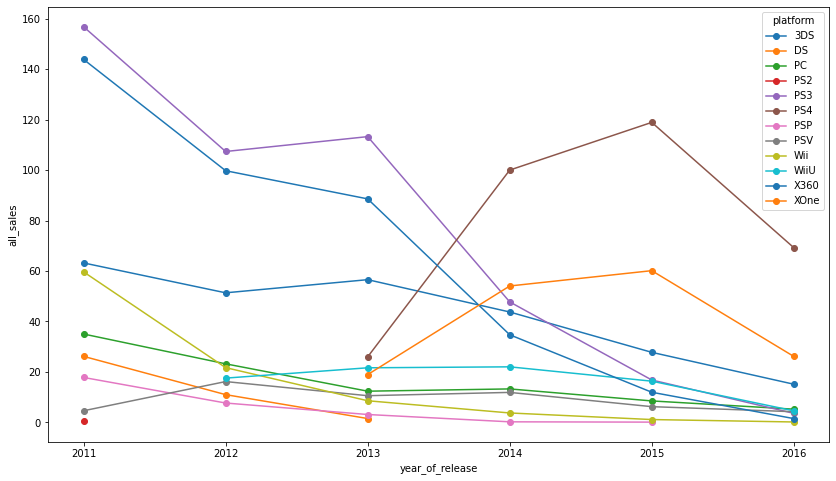

In [25]:
# построим график распределения суммарных продаж по годам
df_actual.pivot_table(index='year_of_release',columns='platform',values='all_sales',aggfunc='sum').plot(style='o-',figsize=(14,8))
plt.ylabel('all_sales')
plt.show()

График иллюстрирует снижение общих продаж каждой платформы на рынке в течении последних 6 лет. Тем неменее, есть две платформы графики которых выбиваются из общей закономерности, платформы "PS4" и "XOne" показывают рост продаж в период с 2013 по 2015 год, в 2016 продажи платформ снижаются, как и у остальных платформ , однако темпы снижения продаж менее высоки относительно рынка.

In [26]:
# создадим таблицу с распределением продаж по годам 
actual_all_sales = df_actual.pivot_table(index='platform',columns='year_of_release',values='all_sales',aggfunc='sum')
actual_all_sales.reset_index(inplace=True)
actual_all_sales.columns = ['platform','2011_sales','2012_sales','2013_sales','2014_sales','2015_sales','2016_sales']
actual_all_sales.head()

,platform,2011_sales,2012_sales,2013_sales,2014_sales,2015_sales,2016_sales
0,3DS,63.20,51.36,56.57,43.76,27.78,15.14
1,DS,26.18,11.01,1.54,NaN,NaN,NaN
2,PC,35.03,23.22,12.38,13.28,8.52,5.25
3,PS2,0.45,NaN,NaN,NaN,NaN,NaN
4,PS3,156.78,107.36,113.25,47.76,16.82,3.60


In [27]:
actual_all_sales = actual_all_sales.fillna(0)

In [28]:
# добавим в таблицу общее число продаж за анализируемые года
# отсортируем таблицу по объему общих продаж и объему продаж за 2016 год
actual_all_sales['total_sales'] = (actual_all_sales['2011_sales'] 
                                   + actual_all_sales['2012_sales'] + actual_all_sales['2013_sales'] 
                                   + actual_all_sales['2014_sales'] + actual_all_sales['2015_sales'] + actual_all_sales['2016_sales'])
actual_all_sales = actual_all_sales.sort_values(by='total_sales',ascending=False)
actual_all_sales_2016 = actual_all_sales.sort_values(by='2016_sales',ascending=False)
actual_all_sales.reset_index(inplace=True)
actual_all_sales = actual_all_sales.drop(columns='index')
display(actual_all_sales)
actual_all_sales_2016

,platform,2011_sales,2012_sales,2013_sales,2014_sales,2015_sales,2016_sales,total_sales
0,PS3,156.78,107.36,113.25,47.76,16.82,3.60,445.57
1,X360,143.84,99.74,88.58,34.74,11.96,1.52,380.38
2,PS4,0.00,0.00,25.99,100.00,118.90,69.25,314.14
3,3DS,63.20,51.36,56.57,43.76,27.78,15.14,257.81
4,XOne,0.00,0.00,18.96,54.07,60.14,26.15,159.32
5,PC,35.03,23.22,12.38,13.28,8.52,5.25,97.68
6,Wii,59.65,21.71,8.59,3.75,1.14,0.18,95.02
7,WiiU,0.00,17.56,21.65,22.03,16.35,4.60,82.19
8,PSV,4.63,16.19,10.59,11.90,6.25,4.25,53.81
9,DS,26.18,11.01,1.54,0.00,0.00,0.00,38.73


,platform,2011_sales,2012_sales,2013_sales,2014_sales,2015_sales,2016_sales,total_sales
5,PS4,0.00,0.00,25.99,100.00,118.90,69.25,314.14
11,XOne,0.00,0.00,18.96,54.07,60.14,26.15,159.32
0,3DS,63.20,51.36,56.57,43.76,27.78,15.14,257.81
2,PC,35.03,23.22,12.38,13.28,8.52,5.25,97.68
9,WiiU,0.00,17.56,21.65,22.03,16.35,4.60,82.19
7,PSV,4.63,16.19,10.59,11.90,6.25,4.25,53.81
4,PS3,156.78,107.36,113.25,47.76,16.82,3.60,445.57
10,X360,143.84,99.74,88.58,34.74,11.96,1.52,380.38
8,Wii,59.65,21.71,8.59,3.75,1.14,0.18,95.02
1,DS,26.18,11.01,1.54,0.00,0.00,0.00,38.73


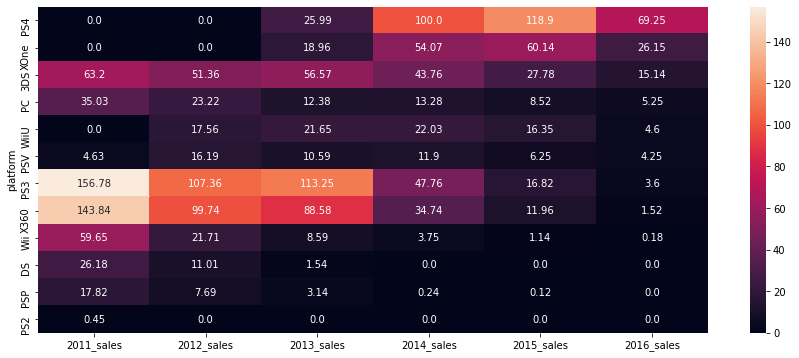

In [29]:
plt.figure(figsize = (15, 6))  
sns.heatmap(actual_all_sales_2016.drop(columns='total_sales').set_index('platform'), annot = True,fmt = '.5')
plt.show()

Платформа "PS4" занимает 3 место по количеству общих продаж за актуальный период с объемом продаж 314.14 миллионов копий, "XOne" на пятом месте общих продаж с 159.32 миллионами проданных копий. 

В связи с общим снижением объема продаж на рынке, важным фактором для анализа является объем продаж непосредственно на 2016 год. В 2016 году объем продаж платформы "PS4" составил 69.25 миллионов проданных копий, это максимальное значение за 2016 год, к тому же следующая платформа по объему продаж за 2016 год "XOne" продала 26.15 миллионов копий, это значительно меньше чем у "PS4" (разница составляет 43,1 миллионов проданных копий). Следовательно, платформа "PS4" первая в списке потенциально прибыльных, далее "XOne".

Также следует обратить внимание на платформу "3DS" по графику распределения суммарных продаж по годам объемы продаж росли в промежутке с 2012 по 2013 год, начиная с 2013 года объем продаж снижается, однако снижение плавное, отсутствуют резкие спады, также объем продаж за 2016 год выше, чем у большинства платформ. Общий объем продаж платформы  "3DS"составляет 257.81 миллионов копий это 4 место из анализируемой выборки, продажи за 2016 - 15.14 миллионов копий , третье место по объему из выборки. Следовательно, платформа "3DS" также входит в список потенциально прибыльных платформ.

Платформы "PS3" и "X360" лидирующие по объему продаж в период 2011-2013, начиная с 2014 года резко снижали свои показатели. На 2016 год объем продаж данных платформ составил всего 3.60 и 1.52 миллионов проданных копий соответственно. Показатели платформ настолько малы в 2016 году, что несмотря на высокие показатели общего объема продаж, вероятно, не могут являться потенциально прибыльными.

В следствии определения тенденции общего спада продаж для всего рынка, для возможности более точного прогноза на 2017 год, требуется сократить актуальный период до 3х лет, с 2014 до 2016 года.

In [30]:
df_actual = df_actual.query('year_of_release >= 2014').reset_index(drop=True)
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknow,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknow,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknow,7.98


Построим график «ящик с усами» по глобальным продажам игр в разбивке по
платформам.

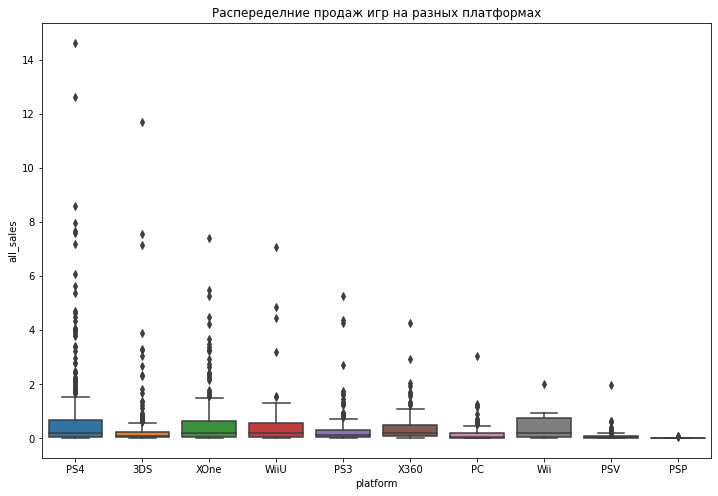

In [31]:
plt.figure(figsize=(12,8))
(sns.boxplot(data=df_actual,x='platform',y='all_sales').set(title='Распеределние продаж игр на разных платформах'))
plt.show()

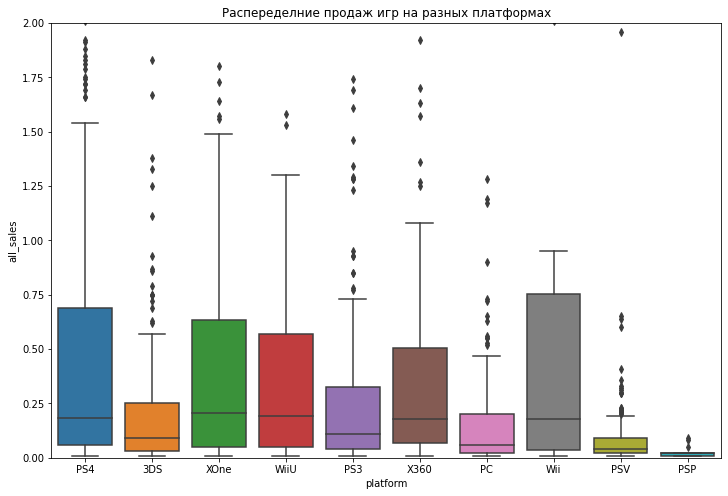

In [32]:
# установим лимиты для возможности детально проанализировать медианы и 75% квантиль
plt.figure(figsize=(12,8))
(sns.boxplot(data=df_actual,x='platform',y='all_sales').set(title='Распеределние продаж игр на разных платформах'))
plt.ylim(0,2)
plt.show()

В данном случае, выбросы — это очень популярные игры, продажи копий которых превосходят остальные. Так как для рынка игр характерен выпуск дальнейших частей/продолжений, то можно предположить, что продажи продолжений популярных игр за прошлые годы будут также иметь высокие продажи. Следовательно, в данном конкретном случае исключать выбросы нельзя.
Медианное значение продаж игры не превышает 205 тысяч копий для всех платформ.
В первую очередь проанализируем распределения для потенциально прибыльных платформ:

Платформа `XOne` имеет наибольшее медианное значение продаж игры 205 тыс. копий, а ее 75% квантиль равен 630 тыс. копий. Также следует заметить, что выбросы в нашем случае очень популярные игры для данной платформы начинаются после продажи 1,5 миллионов копий. Также, анализируя первое распределение, где отображены все выбросы, можно сделать вывод, что на данной платформе самая популярная игра имела продажи около 8 миллионов проданных копий.

Для платформы `PS4` медианное значение равно 185 тыс. проданных копий. 75% квантиль равен 690 тыс. копий, что больше, чем для платформы `XOne`. Анализируя, распределение с выбросами, можно сделать вывод, что на платформе `PS4` располагается наибольшее количество самых популярных игр, отдельно стоит заметить два выброса с количеством продаж 12,5 и 14,5 миллионов копий.

Платформа `3DS` имеет медианное значение продаж игр равное 90 тысячам копий, что значительно меньше предыдущих двух анализируемых платформ. Популярными играми для данной платформы считаются игры с продажами свыше 55 тыс. копий. Однако, есть несколько выбросов с высоким количеством продаж один с почти 12 миллионами проданных копий и два с с почти 8 миллионами проданными копий.

Также следует отметить платформу `WiiU` с медианным значением в 190 тыс. проданных копий и "выбросом», точнее популярной игрой с почти 8 миллионами проданных копий.

In [33]:
kv_1 = np.quantile(df_actual.query('platform == "XOne"').all_sales, 0.75).round(2)
kv_2 = np.quantile(df_actual.query('platform == "3DS"').all_sales, 0.75)
kv_3 = np.quantile(df_actual.query('platform == "PS4"').all_sales, 0.75).round(2)
print(kv_1)
print(kv_2)
print(kv_3)

0.63
0.25
0.69


In [34]:
print(df_actual.groupby('platform')['all_sales'].median())

platform
3DS     0.090
PC      0.060
PS3     0.110
PS4     0.185
PSP     0.020
PSV     0.040
Wii     0.180
WiiU    0.190
X360    0.180
XOne    0.205
Name: all_sales, dtype: float64


Проанализируем, как влияют на продажи внутри одной популярной платформы
отзывы пользователей и критиков. Построим диаграмму рассеяния и
посчитаем корреляцию между отзывами и продажами.

In [35]:
df_actual['user_score'] = df_actual.query('user_score != "tbd"')['user_score']
df_actual['user_score'] = df_actual['user_score'].astype('float64')

In [36]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  all_sales        1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 160.1+ KB


Построим график корреляции между количеством продаж и отзывами пользователей для платформы "PS4", также найдем коэффициент Пирсона.

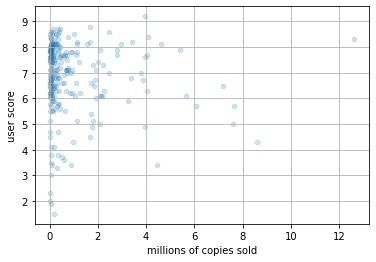

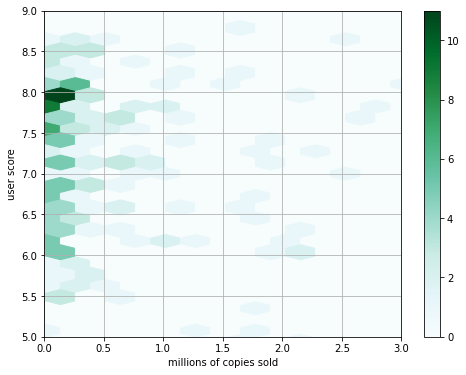

Коэффициент пирсона: -0.040131589472697356


In [37]:
df_actual.query('platform == "PS4"').plot(x='all_sales', y='user_score', kind='scatter' ,grid=True , alpha=0.2);
plt.xlabel('millions of copies sold')
plt.ylabel('user score')
# рассмотрим детальнее скопление точек
df_actual.query('platform == "PS4"').plot(x='all_sales', y='user_score', kind='hexbin',
         xlim=(0,3) , ylim=(5,9) ,gridsize=50, figsize=(8, 6), sharex=False, grid=True);
plt.xlabel('millions of copies sold')
plt.ylabel('user score')
plt.show()
print('Коэффициент пирсона:',df_actual.query('platform == "PS4"')['all_sales'].corr(df_actual.query('platform == "PS4"')['user_score']))

Построим график корреляции между количеством продаж и отзывами критиков для платформы "PS4", также найдем коэффициент Пирсона.

Коэффициент пирсона: 0.40266141068104083


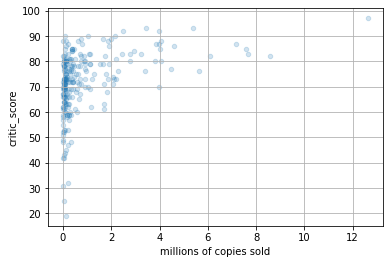

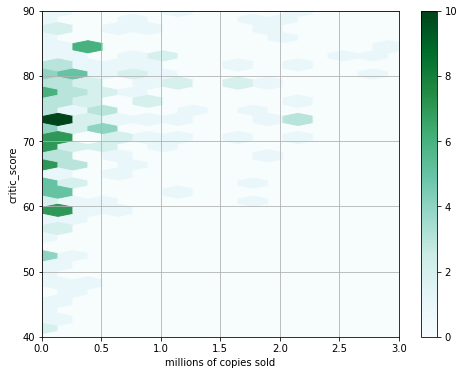

In [38]:
df_actual.query('platform == "PS4"').plot(x='all_sales', y='critic_score', kind='scatter' ,grid=True , alpha=0.2);
plt.xlabel('millions of copies sold')
plt.ylabel('critic_score')
# рассмотрим детальнее скопление точек
df_actual.query('platform == "PS4"').plot(x='all_sales', y='critic_score', kind='hexbin',
        xlim=(0,3) , ylim=(40,90) , gridsize=50, figsize=(8, 6), sharex=False, grid=True);
plt.xlabel('millions of copies sold')
plt.ylabel('critic_score')
print('Коэффициент пирсона:',df_actual.query('platform == "PS4"')['all_sales'].corr(df_actual.query('platform == "PS4"')['critic_score']))

Между параметрами количество проданных копий и оценками пользователей почти отсутствует корреляция, 
между параметрами количество проданных копий и оценками критиков существует слабая корреляция. При этом стоит заметить, что самая популярная игра, с более 12 миллионов проданных копий имеет высокую оценку, как и среди критиков, так и среди пользователей. 

Построим график корреляции между количеством продаж и отзывами критиков и коэффициент Пирсона для оставшихся платформ.

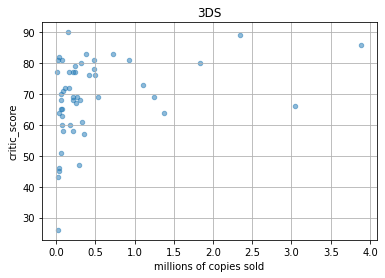

Коэффициент Пирсона: 0.31411749286905105


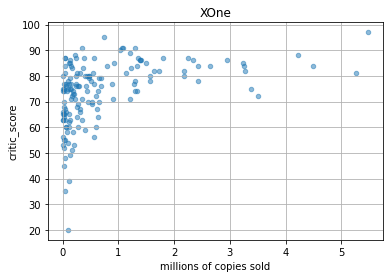

Коэффициент Пирсона: 0.42867694370333226


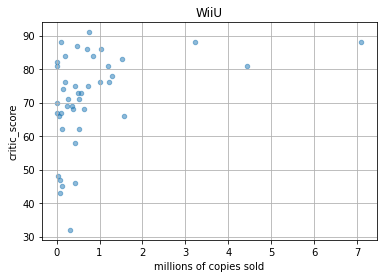

Коэффициент Пирсона: 0.370201412480884


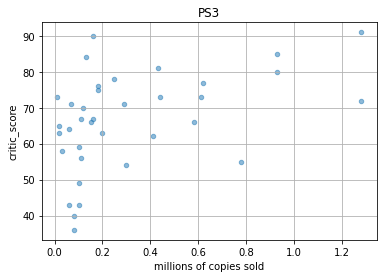

Коэффициент Пирсона: 0.44657460493190704


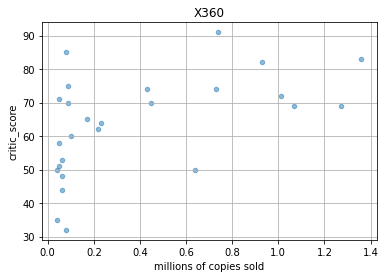

Коэффициент Пирсона: 0.5257228356581523


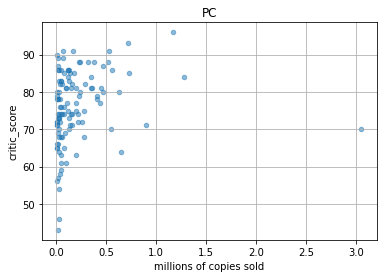

Коэффициент Пирсона: 0.17463413769350036


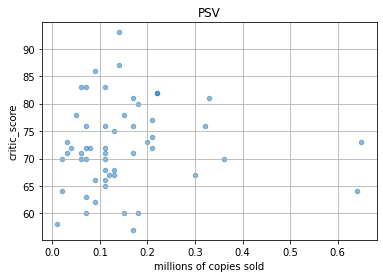

Коэффициент Пирсона: 0.04266490657009526


In [39]:
list_platforms = ['3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'PSV']
for platform_1 in list_platforms:
    df_actual.query('platform == @platform_1').plot(x='all_sales', y='critic_score', kind='scatter' ,grid=True , alpha=0.5,title=platform_1);
    plt.xlabel('millions of copies sold')
    plt.ylabel('critic_score')
    plt.show()
    print('Коэффициент Пирсона:',df_actual.query('platform == @platform_1')['all_sales'].corr(df_actual.query('platform == @platform_1')['critic_score']))

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (✅):</b> Исполнение с помощью цикла - суперское! Меньше рутины в коде 👏

В целом можно сказать, что между параметрами количество проданных копий и отзывы критиков существует слабая корреляция, анализируя распределения платформ '3DS', 'XOne', 'WiiU', 'PS3', 'X360' можно отметить,что наиболее популярная игра имеющая гораздо больше проданных копий, чем у прочих игр для каждой взятой платформы имеет высокие рейтинг среди критиков, однако на распределениях для платформ 'PC' и 'PSV' наиболее продаваемые игры для данных площадок имеют средние оценки критиков. Распределения прочих платформ соотносимо с распределением популярной платформы "PS4".

Построим график корреляции между количеством продаж и отзывами пользователей, коэффициент Пирсона для оставшихся платформ.

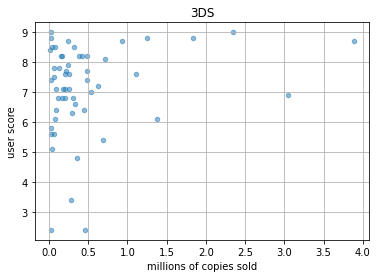

Коэффициент Пирсона: 0.2151932718527028


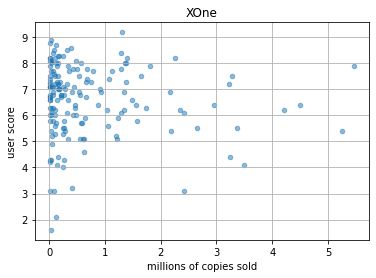

Коэффициент Пирсона: -0.0703839280647581


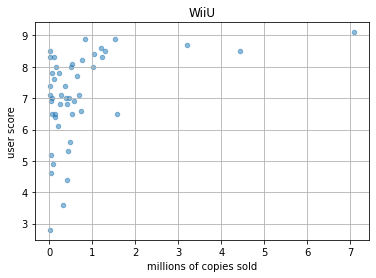

Коэффициент Пирсона: 0.4079264579217078


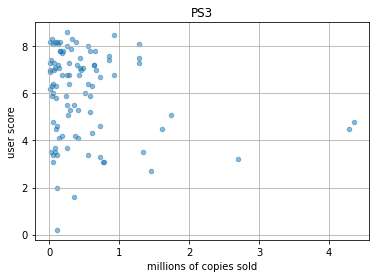

Коэффициент Пирсона: -0.16676141347662116


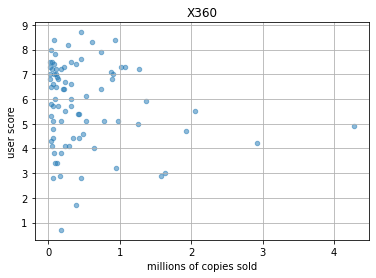

Коэффициент Пирсона: -0.138444570945665


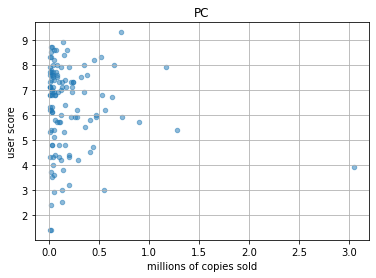

Коэффициент Пирсона: -0.07159665703472452


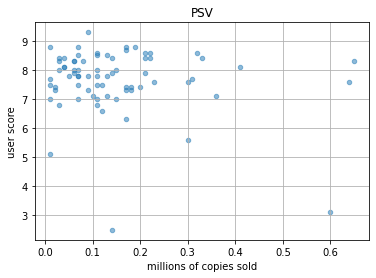

Коэффициент Пирсона: -0.16845504978064446


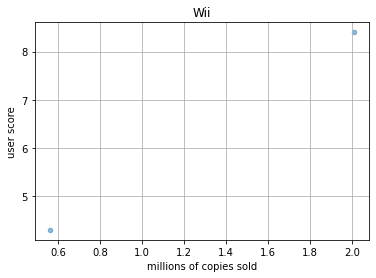

Коэффициент Пирсона: 1.0


In [40]:
list_platforms = ['3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'PSV','Wii']
for platform_1 in list_platforms:
    df_actual.query('platform == @platform_1').plot(x='all_sales', y='user_score', kind='scatter' ,grid=True , alpha=0.5,title=platform_1);
    plt.xlabel('millions of copies sold')
    plt.ylabel('user score')
    plt.show()
    print('Коэффициент Пирсона:',df_actual.query('platform == @platform_1')['all_sales'].corr(df_actual.query('platform == @platform_1')['user_score']))

Между параметрами количество проданных копий и отзывы пользователей существует слабая корреляция, граничащая с полным ее отсутствием, закономерность прослеживающаяся на распределении между количеством проданных копий и отзывами критиков, что наиболее продаваемые игры имеют высокие оценки среди критиков, менее выражена для оценок пользователей, так популярные игры на платформах `XOne`, `PS3`, `X360`,`PC` имеют средние оценки пользователей, для платформы `PSV` одна из наиболее популярных игр с продажами в 600 тыс. копий имеет оценку пользователей "3" т.е. ниже среднего. Распределения прочих платформ соотносимо с распределением популярной платформы `PS4`.

Рассмотрим общее распределение игр по жанрам. 

In [41]:
df_actual[['genre','all_sales']].head(30)
df_actual.groupby('genre')['all_sales'].median()

genre
Action          0.090
Adventure       0.030
Fighting        0.125
Misc            0.090
Platform        0.140
Puzzle          0.045
Racing          0.090
Role-Playing    0.110
Shooter         0.515
Simulation      0.100
Sports          0.180
Strategy        0.060
Name: all_sales, dtype: float64

In [42]:
df_actual.query('platform == "PS4"')[['genre','all_sales']].head(30)
df_actual.query('platform == "PS4"').groupby('genre')['all_sales'].mean()

genre
Action          0.645211
Adventure       0.226429
Fighting        0.454706
Misc            0.408947
Platform        0.602222
Puzzle          0.020000
Racing          0.564444
Role-Playing    0.568431
Shooter         2.064737
Simulation      0.205000
Sports          1.190714
Strategy        0.080000
Name: all_sales, dtype: float64

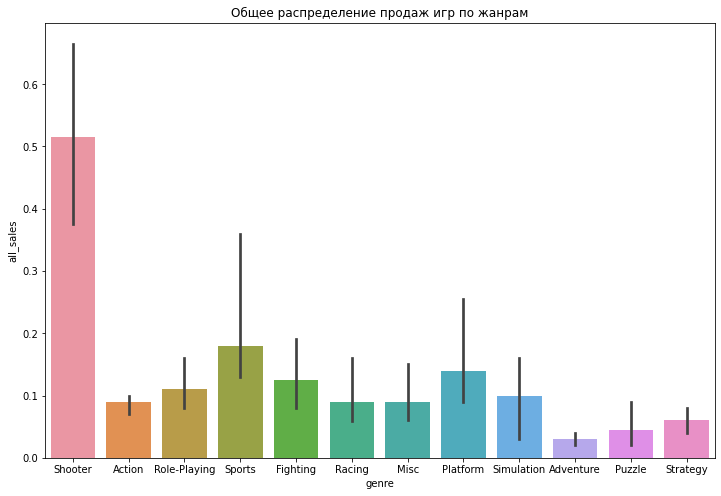

In [43]:
from numpy import median
plt.figure(figsize=(12,8))
ax = sns.barplot(y=df_actual.all_sales,x=df_actual.genre,estimator=median)
plt.title('Общее распределение продаж игр по жанрам')
plt.show()

Среди всех жанров выделяется жанр "Shooter" с медианным значением 515 тыс. проданных копий, жанр с наименьшим медианным значением количества проданных копий "Adventure" с  значением 30 тыс. проданных копий.

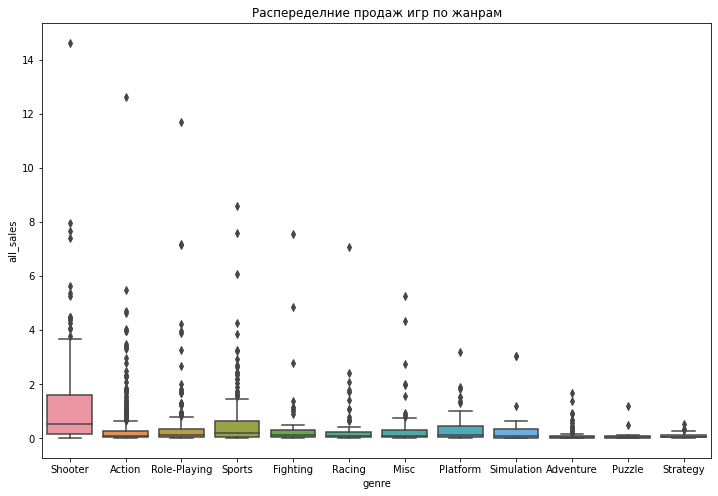

In [44]:
plt.figure(figsize=(12,8))
(sns.boxplot(data=df_actual,x='genre',y='all_sales').set(title='Распеределние продаж игр по жанрам'))
plt.show()

По граффику `boxplot` видно, что игра с наибольшим количеством проданных копий, более 14 миллионов находится в жанре "Shooter" , две наиболее популярные игры с примерно 12 миллионами проданных копий находятся в жанрах 'Action' и 'Role-Playing'. Также успешные игры есть в жанрах 'Sports', 'Fighting','Racing' и 'Misc'. Согласно графику в жанре "Strategy" нет ни одной игры с более 1 миллионом проданных копий, также наименее успешные игры в жанрах "Puzzle" , "Adventure" и "Simulation" в данных жанрах продажи не превысили 1,5 миллионов копий.

Посчитаем сумму общих продаж и количесвтво выпущенных игр c группировкой по жанрам и отсортируем по убыванию количества продаж.

In [45]:
total_sales_genre = df_actual.groupby('genre')['all_sales'].agg({'sum','count'})
total_sales_genre = total_sales_genre.reset_index()
total_sales_genre = total_sales_genre.sort_values(by='sum',ascending=False)
total_sales_genre = total_sales_genre.reset_index(drop=True)
total_sales_genre

,genre,sum,count
0,Action,199.36,619
1,Shooter,170.94,128
2,Sports,109.48,161
3,Role-Playing,101.44,221
4,Misc,37.55,113
5,Fighting,28.22,60
6,Racing,27.52,69
7,Platform,18.09,38
8,Adventure,17.55,185
9,Simulation,13.13,44


Проанализировав графики `barplot` и `boxplot` , а также рассчитав общее количество продаж можно сделать вывод что наиболее популярным и прибыльным жанром является `Shooter` , он имеет максимальное медианное значение проданных копий, самая популярная игра с 14 миллионами копий также выпущена в данном жанре, к тому же игры в жанре "Shooter" располагаются на втором месте по общей сумме проданных копий с  значением 170,94 миллионов копий, при этом количество выпущенных игр 128 штук для сравнения на первом месте по количеству проданных копий игры в жанре "Action" с значением продаж 199.36 миллионов копий, а количеством выпущенных игр 619 шт. это почти в 5 раз больше выпущенных игр.

Принимая во внимание, большое количество выпущенных игр, а также, что вторая по количеству проданных копий игра с более 12 миллионами продаж выпущена в жанре "Action", данный жанр также является популярным. 

Наиболее популярные и прибыльные игры в жанрах: "Shooter" , "Action" , "Role-Playing" , "Sports".

Наименее популярные и прибыльные игры в жанрах: "Puzzle" , "Strategy" , "Adventure".

<a id="step_3"></a> 
## Портрет пользователя каждого региона

Определим для ползователя каждого региона (NA, EU, JP) самые популярные платформы.

  platform  na_sales
0      PS4     98.61
1     XOne     81.27
2     X360     28.30
3      3DS     22.64
4      PS3     22.05


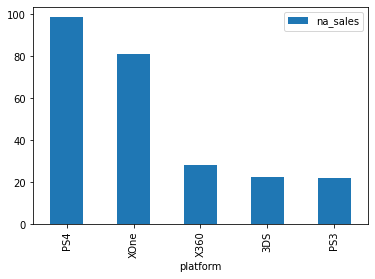

In [46]:
top_5_na = df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).reset_index()
print(top_5_na)
top_5_na.plot.bar(x='platform',y='na_sales')
plt.show()

  platform  eu_sales
0      PS4    130.04
1     XOne     46.25
2      PS3     25.54
3       PC     17.97
4      3DS     16.12


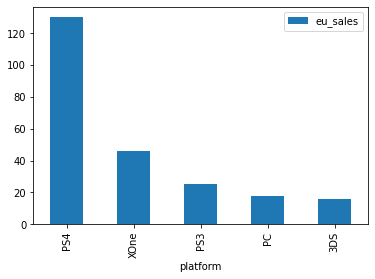

In [47]:
top_5_eu = df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).reset_index()
print(top_5_eu)
top_5_eu.plot.bar(x='platform',y='eu_sales')
plt.show()

  platform  jp_sales
0      3DS     44.24
1      PS4     15.02
2      PSV     14.54
3      PS3     11.22
4     WiiU      7.31


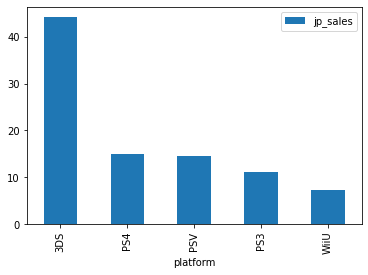

In [48]:
top_5_jp =  df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).reset_index()
print(top_5_jp)
top_5_jp.plot.bar(x='platform',y='jp_sales')
plt.show()

Первые две самые популярные платформы в Северной Америке и Европе совпадают, это платформы "PS4" и "XOne", при этом на Европу приходится больше продаж, чем на Северную Америку, так в наиболее популярной платформе "PS4" в Европе и Северной Америке, к тому же занимающей второе место по количеству продаж на рынке Японии, на рынок Европы приходится 130,04 миллионов проданных копий, на рынок Северной Америки приходится  98.61 миллионов проданных копий, это на 24% меньше, чем Европе, на рынок Японии - 15,02 миллионов проданных копий это в 8,5 раз меньше чем в Европе или в 6,5 раз меньше, чем в Северной Америке.

У платформы "XOne" в Северной Америке почти в два раза больше продаж, чем на рынке Европы, 81.27 и 46.25 миллионов проданных копий соответственно. Платформа "XOne" не вошла в топ 5 платформ на рынке Японии.


Платформа "3DS" занимает первое место по количеству проданных копий в Японии с значением 44.24 миллионами проданных копий, на рынке Северной Америке данная платформа занимает 4 место с 22.64 миллионами проданных копий , на рынке Европы 5 место с 16.12 миллионами проданных копий.

Определим для ползователя каждого региона (NA, EU, JP) самые популярные жанры игр.

          genre  na_sales
0       Shooter     79.02
1        Action     72.53
2        Sports     46.13
3  Role-Playing     33.47
4          Misc     15.05


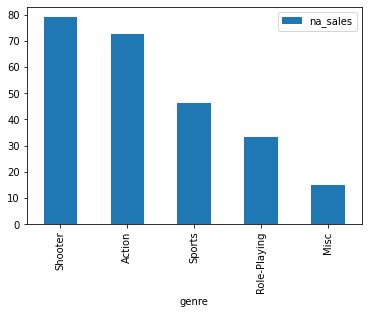

In [49]:
top_5_genre_na = df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).reset_index()
print(top_5_genre_na)
top_5_genre_na.plot.bar(x='genre',y='na_sales')
plt.show()

          genre  eu_sales
0        Action     74.68
1       Shooter     65.52
2        Sports     45.73
3  Role-Playing     28.17
4        Racing     14.13


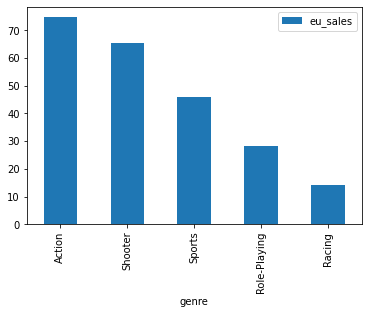

In [50]:
top_5_genre_eu = df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).reset_index()
print(top_5_genre_eu)
top_5_genre_eu.plot.bar(x='genre',y='eu_sales')
plt.show()

          genre  jp_sales
0  Role-Playing     31.16
1        Action     29.58
2      Fighting      6.37
3          Misc      5.61
4       Shooter      4.87


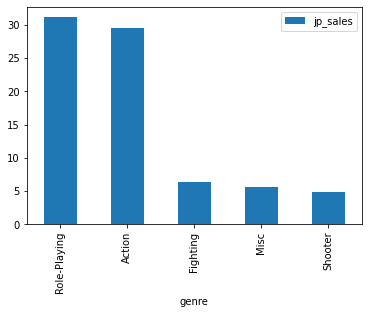

In [51]:
top_5_genre_jp = df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).reset_index()
print(top_5_genre_jp)
top_5_genre_jp.plot.bar(x='genre',y='jp_sales')
plt.show()

В Европе и Северной Америке примерно одинаковое количество продаж игр жанра "Action", 74.68 и 72.53 миллионов копий соответственно, при этом данный жанр самый популярный в Европе, в Северной Америке он занимает лишь второе место, также данный жанр популярен в Японии в ней он занимает второе место по количеству продаж с значением в 29.58 миллионов копий.

На первом месте по продажам в Северной Америке жанр "Shooter", он также популярен в Европе в ней он на втором месте, в Японии данный жанр замыкает том пять жанров.

Жанр "Sports" занимает третье место в Северной Америке и Европе и к тому же имеет примерно равное количество продаж в данных регионах 46.13 и 45.73 миллионов копий соответственно. 

Жанр "Role-Playing" занимает первое место по количеству продаж в Японии и четвертое в Европе и Северной Америке.

Из данный следует, что в регионах Северная Америка и Европа более схожи пользовательские предпочтения, с регионом Япония они имеют существенные различия. 

Распределение продаж по категориям рейтинга ESRB.

   rating  na_sales
0       M     96.42
1  unknow     64.72
2       E     50.74
3       T     38.95
4    E10+     33.23


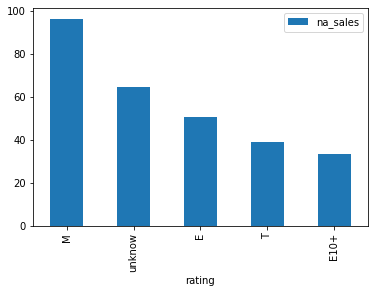

In [52]:
rating_na = df_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
print(rating_na)
rating_na.plot.bar(x='rating',y='na_sales')
plt.show()

   rating  eu_sales
0       M     93.44
1  unknow     58.95
2       E     58.06
3       T     34.07
4    E10+     26.16


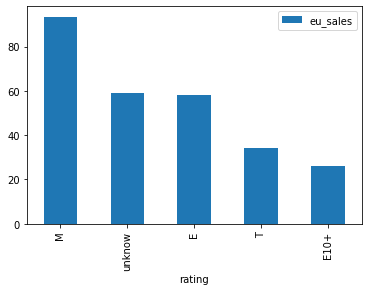

In [53]:
rating_eu = df_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
print(rating_eu)
rating_eu.plot.bar(x='rating',y='eu_sales')
plt.show()

   rating  jp_sales
0  unknow     56.90
1       T     14.78
2       E      8.94
3       M      8.01
4    E10+      4.46


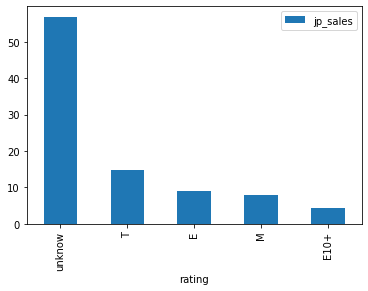

In [54]:
rating_jp = df_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
print(rating_jp)
rating_jp.plot.bar(x='rating',y='jp_sales')
plt.show()

Добавим расшифровку к буквенному обозначению категории рейтинга ESRB:

* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»

"Unknown" - неизвестные, пропущенные значения, которые могли принадлежать к любой категории.

Распределения проданных копий игр по рейтингу ESRB для рынков Северной Америки и Европы почти идентичны, в них преобладают игры категории «M» («Mature») — «Для взрослых, большую долю занимают игры без данных о рейтинге, далее располагается категория «E» — «Для всех», далее «T» — «Подросткам» и наименее распространённая «E10+» — «Для всех от 10 лет и старше».

Распределение рынка Японии выглядит совершенно иначе. Наибольшее и в разы превосходящие остальные данные занимают неизвестные данные (61% от всех данных рынка Японии). Наиболее популярная в других регионах категория «M», занимает лишь 8,6% рынка Японии, можно предположить, что такое распределение связано с законодательством Японии.


<a id="step_4"></a> 
## Проверка Гипотез

<a id="step_4.1"></a> 
### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Чтобы проверить гипотезу выбран метод `scipy.stats.ttest_ind` так как он позволяет проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Нулевая гипотеза в данных случаях всегда о равенстве средних, альтернативная противоположная о неравенстве.

Сформулируем нулевую гипотезу:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформируем альтернативную гипотезу:

Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [55]:
from scipy import stats as st
user_rating_xone = df_actual.query('platform == "XOne"')['user_score'].dropna()
user_rating_pc = df_actual.query('platform == "PC"')['user_score'].dropna()
alpha = 0.05
results = st.ttest_ind(
user_rating_xone,
user_rating_pc
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC различны")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые ")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые 


<a id="step_4.2"></a> 
### Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports  разные.

В данном случае также выбран метод `scipy.stats.ttest_ind` .

Сформулируем нулевую гипотезу:

Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Сформируем альтернативную гипотезу:

Средние пользовательские рейтинги жанров Action и Sports различаются.

In [56]:
user_rating_action = df_actual.query('genre == "Action"')['user_score'].dropna()
user_rating_sports = df_actual.query('genre == "Sports"')['user_score'].dropna()
alpha = 0.05
results = st.ttest_ind(
user_rating_action,
user_rating_sports
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, Средние пользовательские рейтинги жанров Action и Sports различны")
else:
    print("Не получилось отвергнуть нулевую гипотезу, Средние пользовательские рейтинги жанров Action и Sports одинаковые ")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу, Средние пользовательские рейтинги жанров Action и Sports различны


<a id="step_5"></a> 
## Общий вывод

Мы провели исследование данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах.

На этапе исследовательского анализа данных мы:

* построили график выпуска игр по годам и определили актуальный период для исследования.
* определили платформы с наибольшими суммарными продажами и построили распределения по годам.
* построили распределение продаж на платформах по годам, рассчитали продажи на различных платформах по годам и выделили платформы `PS4` , `XOne` и `3DS` как потенциально прибыльные.
* построили диаграмму размаха по глобальным продажам игр в разбивке по платформам и определили на каких платформах есть выбросы, а точнее самые популярные игры, продажи которых многократно превышают продажи остальных игр, так обнаружили, что на платформе `PS4` сразу две очень популярные игры с количеством продаж 12,5 и 14,5 миллионов копий.
* проанализировали влияние отзывов пользователей и критиков на продажи игр, так между параметрами отзывы критиков и продажи существует слабая корреляция, а между параметрами отзывы пользователей существует очень слабая корреляция, граничащая с полным ее отсутствием.
* построили графики распределения общих продаж по жанрам, а также рассчитали сумму общих продаж и количество выпущенных игр c группировкой по жанрам и определили наиболее и наименее популярные жанры:

    * Наиболее популярные и прибыльные игры в жанрах: "Shooter" , "Action" , "Role-Playing" , "Sports".

    * Наименее популярные и прибыльные игры в жанрах: "Puzzle" , "Strategy" , "Adventure".
    
Далее мы определили портрет пользователя каждого региона.

На данном этапе мы определили, что рынки игр в Северной Америке и Европе имеют схожие пользовательские предпочтения, в то время как рынок игр Японии имеет существенные различия.

На четвертом этапе мы проверяли гипотезы.
* гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC оказалась верна, нулевую гипотезу не удалось отвергнуть.
* гипотеза о неравенстве средних пользовательских рейтингов жанров Action и Sports оказалась верна, нулевая гипотеза о равенстве отвергнута.

Целью данного исследования было выявление определяющих успешность игры закономерностей, для возможности построения прогноза на 2017 год.

Закономерности, определяющие успешность игры:

Наиболее популярные и прибыльные игры в жанрах: "Shooter" и "Action", самый прибыльный жанр "Shooter", в нем есть сверхприбыльные игры с десятками миллионов проданных копий, также он лидирует на рынках Северной Америки и Европы, в которых наибольшее количество пользователей.

Рынок игр имеет тенденцию снижения объема продаж за последние несколько лет, однако платформы `PS4` , `XOne` и `3DS` не так стремительно, как остальные снижают объемы продаж и все еще имеют большое количество проданных копий. Самая потенциально прибыльная платформа `PS4` она имеет наибольший объем продаж за 2016 год, а также именно на ней расположено наибольшее количество популярных и  сверхпопулярных игр с десятками миллионов проданных копий.

Для наибольшей успешности игры она должна иметь рейтинг «M» («Mature») — «Для взрослых» по категориям рейтинга ESRB, так как данная категория наиболее популярна среди пользователей двух масштабных ранках Северной Америки и Европы.